<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/nlp/principal_component_analysis_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

PCA is based on the `Singular Value Decomposition(SVD)` of the `Covariance Matrix` of the original dataset. The `Eigenvectors` of such decomposition are used as a **rotation matrix**. The Eigenvectors are arranged in the rotation matrix in decreasing order according to its **explained variance**. This last term is related to `EigenValues` of the SVD.

PCA is a potent technique with applications ranging from simple space transformation, dimensionality reduction, and mixture separation from spectral information.

<img src="https://dbjxwcks.labs.coursera.org/notebooks/GaussianScatterPCA.svg">



In [1]:
import math
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

from sklearn.decomposition import PCA

random.seed(100)


To start, let us consider a pair of random variables $x$, $y$. Consider the base case $y=n*x$. The $x$ and $y$ variables will be perfectly correlated to each other since $y$ is just a scaling of $x$.

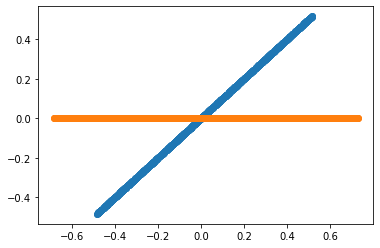

In [2]:
n = 1
x = np.random.uniform(1, 2, 1000)
y = x.copy() * n

# PCA works better if the data is centered
x = x - np.mean(x)
y = y - np.mean(y)

data = pd.DataFrame({'x': x, 'y': y})
plt.scatter(data.x, data.y)

# instantiate a PCA. Choose to get 2 outputs variables
pca = PCA(n_components=2)

# crate athe transformation model for this data. Internally, it gets the  
# rotation matrix and the explained variance
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data)
dataPCA = pd.DataFrame(data=rotatedData, columns=['PC1', 'PC2'])

plt.scatter(dataPCA.PC1, dataPCA.PC2);

Now, what is the direction in which the variables point?

## Understanding the transformation model pcaTr

As mentioned before, a PCA model is composed of a rotation matrix and its corresponding explained variance. In the next module, we will explain the details of the rotation matrices.

- `pcaTr.components_` has the rotation matrix
- `pcaTr.explained_variance_` has the explained variance of each principal component

In [3]:
print('Eigenvectors or principal component: First row must be in the direction of [1. n]')
print(pcaTr.components_)

Eigenvectors or principal component: First row must be in the direction of [1. n]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


$cos(45^o) = sin(45^o) = 0.7071$

The rotation matrix is equal to:

$$R = \begin{bmatrix} cos(45^o) & sin(45^o) \\ -sin(45^o) & cos(45^o) \end{bmatrix}$$ 

And $45^o$ is the same angle that form the variables y = 1 * x.

Then, PCA has identified the angle in which point the original variables.

In [4]:
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvalues or explained variance
[1.61808273e-01 1.37681322e-33]


And the explained Variance is around [0.166 0]. Remember that the Variance of a uniform random variable x ~ U(1, 2), as our x and y, is equal to:

$$Var(x) = \frac {(2 - 1)^2}{12} = 0.083333$$
    
Then the explained variance given by the PCA can be interpret as

$$[Var(x) + Var(y) \ 0] = [0.0833 + 0.0833 \  0] = [0.166 \ 0]$$

Which means that all the explained variance of our new system is explained by our first principal component. 

## Correlated Normal Random Variables.

Now, we will use a controlled dataset composed of 2 random variables with different variances and with a specific Covariance among them. The only way I know to get such a dataset is, first, create two independent Normal random variables with the desired variances and then combine them using a rotation matrix. In this way, the new resulting variables will be a linear combination of the original random variables and thus be dependent and correlated.

In [11]:
std1 = 1
std2 = 0.333

x = np.random.normal(0, std1, 1000)
y = np.random.normal(0, std2, 1000)

# PCA works better if the data is centered
x = x - np.mean(x)
y = y - np.mean(y)

# define a pair of dependent variables with a desired amount of covariance 
n = 1
angle = np.arctan(1 / n)
f'angle: {angle * 180 / math.pi}'

'angle: 45.0'

In [12]:
# create a rotation matrix using the given angle
rotation_matrix = np.array([[np.cos(angle), np.sin(angle)],
                 [-np.sin(angle), np.cos(angle)]])
f'Rotation matrix: {rotation_matrix}'

'Rotation matrix: [[ 0.70710678  0.70710678]\n [-0.70710678  0.70710678]]'

In [13]:
xy = np.concatenate(([x], [y]), axis=0).T
xy

array([[-0.37249968, -0.3427448 ],
       [ 0.72920862, -0.39777451],
       [-1.67759593,  0.34987432],
       ...,
       [ 0.00486229, -0.01359489],
       [ 0.54440007, -0.00882283],
       [-0.48987789,  0.18720761]])

Transform teh data using the rotation matrix. It correlated the two variables

In [14]:
data = np.dot(xy, rotation_matrix)

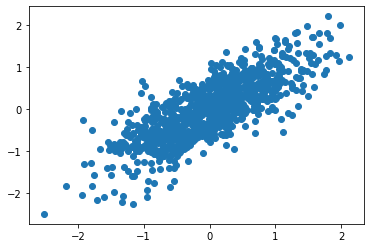

In [15]:
plt.scatter(data[:, 0], data[:, 1]);

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.71422467 -0.69991651]
 [-0.69991651  0.71422467]]

Eigenvalues or explained variance
[0.93913175 0.112143  ]


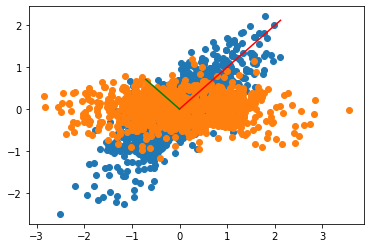

In [18]:
plt.scatter(data[:, 0], data[:, 1])
pca = PCA(n_components=2)
pcaTr = pca.fit(data)
dataPCA = pcaTr.transform(data)
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)
plt.scatter(dataPCA[:, 0], dataPCA[:, 1])

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')

The explanation of this chart is as follows:
* The rotation matrix used to create our correlated variables took the original uncorrelated variables `x` and `y` and transformed them into the blue points.
* The PCA transformation finds out the rotation matrix used to create our correlated variables (blue points). Using the PCA model to transform our data, puts back the variables as our original uncorrelated variables.
* The explained Variance of the PCA is 

$$[1.0094, 0.1125] $$

which is approximately

$$[1, 0.333 * 0.333] = [std1^2, std2^2],$$

the parameters of our original random variables x and y

You can use the previous code to try with other standard deviations and correlations and convince your self of this fact. 

## PCA as a strategy for dimensionality reduction

The principal components contained in the rotation matrix, are decreasingly sorted depending on its explained Variance. It usually means that the first components retain most of the power of the data to explain the patterns that **generalize** the data. Nevertheless, for some applications, we are interested in the patterns that explain much less Variance, for example, in novelty detection. 

In the next figure, we can see the original data and its corresponding projection over the first and second principal components. In other words, data comprised of a single variable.

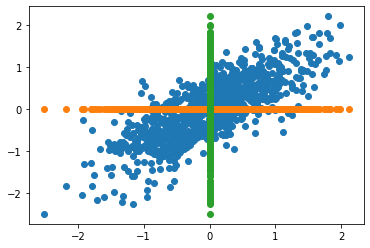

In [20]:
nPoints = len(data)

# Plot the original data in blue
plt.scatter(data[:,0], data[:,1])

#Plot the projection along the first component in orange
plt.scatter(data[:,0], np.zeros(nPoints))

#Plot the projection along the second component in green
plt.scatter(np.zeros(nPoints), data[:,1]);